1. Data Loading and Preparation
Import necessary libraries:

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')

2. Exploratory Data Analysis (EDA)

In [40]:
print(dfH.head())
print(dfH.describe())
print(dfH.info())

   Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0  2021-01-01     0    26.0         46.0                       90   
1    23.0  2021-01-01     1    23.0         46.0                       88   
2    20.0  2021-01-01     2    28.0         48.0                       87   
3     9.0  2021-01-01     3     7.0         16.0                       81   
4     7.0  2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  
0                  2.4                       1                  10.2  
1                  1.8                       1                  10.0  
2                  1.1                       2                  10.1  
3                  1.6                       2                  10.6  
4                  1.6                       2                   9.9  
             Casual          Hour        Member   Total_rides  \
count  26269.000000  26280.000000  26269.00000

In [41]:
dfH.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [42]:
from sklearn.impute import SimpleImputer
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])

In [43]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [44]:
# Add a new column with an index as a counting number
dfH['Count'] = dfH.index

In [45]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4


In [46]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

# Extract Day of Week
dfH['Weekdays'] = dfH['Date'].dt.dayofweek

In [47]:
# Define a function to determine the season based on the month
def get_season(Month):
    if Month in [12, 1, 2]:
      return 'Winter'
    elif Month in [3, 4, 5]:
      return 'Spring'
    elif Month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,4,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,4,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,4,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,4,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,4,Winter


3. Data Visualization

Text(0.5, 1.0, 'Hourly Distribution of Bike Rentals')

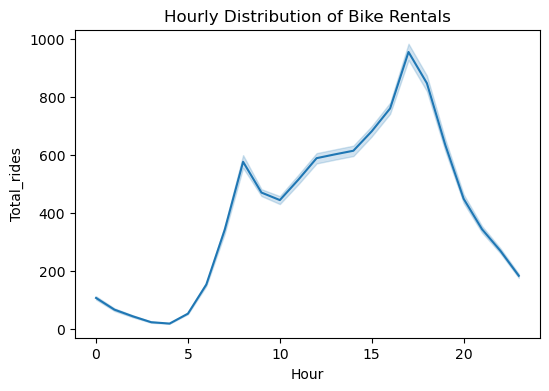

In [48]:
# Hourly distribution
plt.figure(figsize=(6, 4))
sns.lineplot(x='Hour', y='Total_rides', data=dfH)
plt.title('Hourly Distribution of Bike Rentals')


Text(0.5, 1.0, 'Daily Distribution of Bike Rentals')

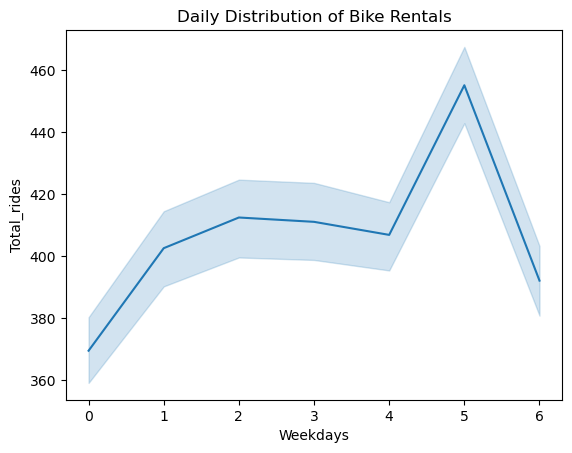

In [49]:
# Daily distribution
sns.lineplot(x='Weekdays', y='Total_rides', data=dfH)
plt.title('Daily Distribution of Bike Rentals')


Text(0.5, 1.0, 'Monthly Distribution of Bike Rentals')

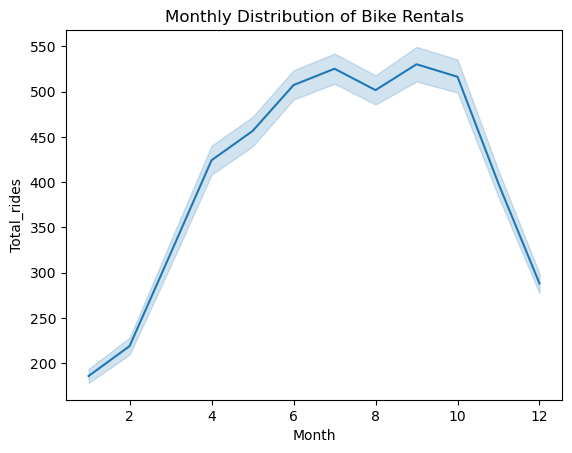

In [50]:
# Monthly distribution
sns.lineplot(x='Month', y='Total_rides', data=dfH)
plt.title('Monthly Distribution of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Weather Condition')

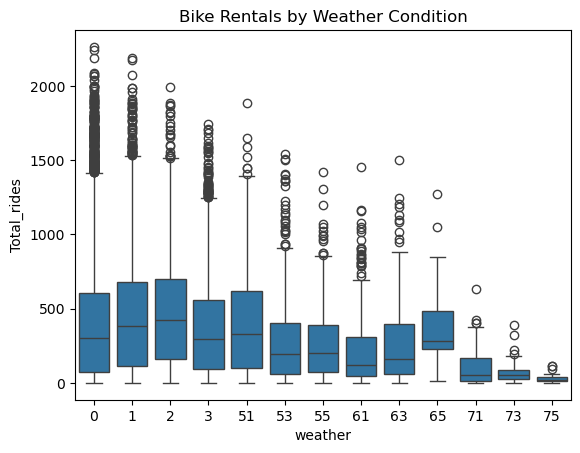

In [51]:
# Visualize the impact of weather:
sns.boxplot(x='weather', y='Total_rides', data=dfH)
plt.title('Bike Rentals by Weather Condition')


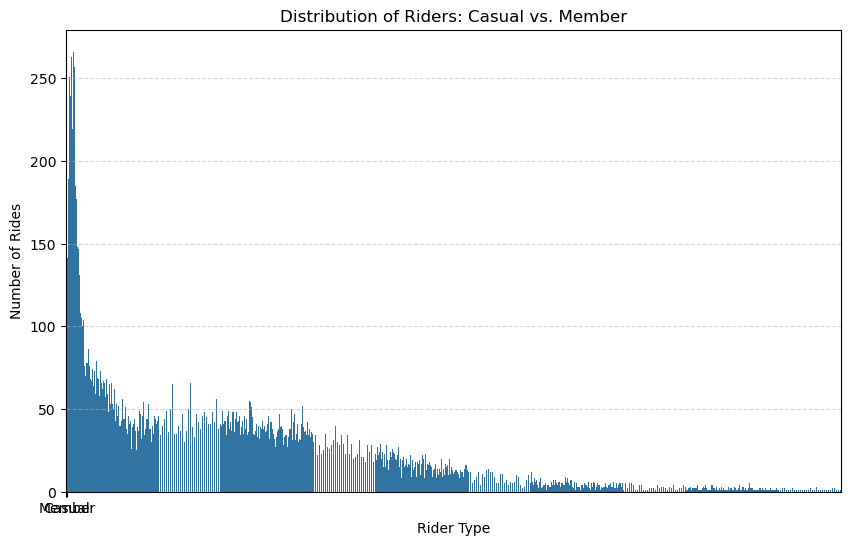

In [67]:
plt.figure(figsize=(10, 6)) 

# Create the countplot
sns.countplot(x='Member', data=dfH)

# Set title and labels
plt.title('Distribution of Riders: Casual vs. Member')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Casual', 'Member']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [53]:
import pandas as pd

# Convert 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Define functions to categorize days
def is_weekday(day):
    return day < 5  # Monday to Friday (0-4)

def is_weekend(day):
    return day >= 5  # Saturday (5) and Sunday (6)

# Create new columns for 'is_weekday' and 'is_weekend'
dfH['is_weekday'] = dfH['Weekdays'].apply(is_weekday)
dfH['is_weekend'] = dfH['Weekdays'].apply(is_weekend)

holidays = ['2023-01-01', '2023-12-25']  # Example: New Year's Day, Christmas Day

# Create a Series of booleans indicating whether each date is a holiday
dfH['is_holiday'] = dfH['Date'].isin(pd.to_datetime(holidays))

# Calculate 'is_working_day'
dfH['is_working_day'] = dfH['is_weekday'] & ~dfH['is_holiday'] 

# Example usage:
weekend_data = dfH[dfH['is_weekend']]
working_day_data = dfH[dfH['is_working_day']]

print(weekend_data)
print(working_day_data)
dfH.head(2)

       Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
24        4.0 2021-01-02     0     8.0         12.0        99   5.2       61   
25        4.0 2021-01-02     1    10.0         14.0        99   5.1       51   
26        1.0 2021-01-02     2     0.0          1.0        98   5.2        3   
27        1.0 2021-01-02     3     1.0          2.0        98   4.0        3   
28        4.0 2021-01-02     4     2.0          6.0        98   4.4        3   
...       ...        ...   ...     ...          ...       ...   ...      ...   
26275   132.0 2023-12-31    19   190.0        322.0        71  -7.7        0   
26276   125.0 2023-12-31    20   194.0        319.0        79 -10.2        0   
26277    84.0 2023-12-31    21   137.0        221.0        80 -11.0        0   
26278    83.0 2023-12-31    22   142.0        225.0        80 -10.4        0   
26279    82.0 2023-12-31    23   106.0        188.0        73  -8.5        0   

       Windspeed  Count  Month  Year  W

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,is_weekday,is_weekend,is_holiday,is_working_day
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,4,Winter,True,False,False,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,4,Winter,True,False,False,True


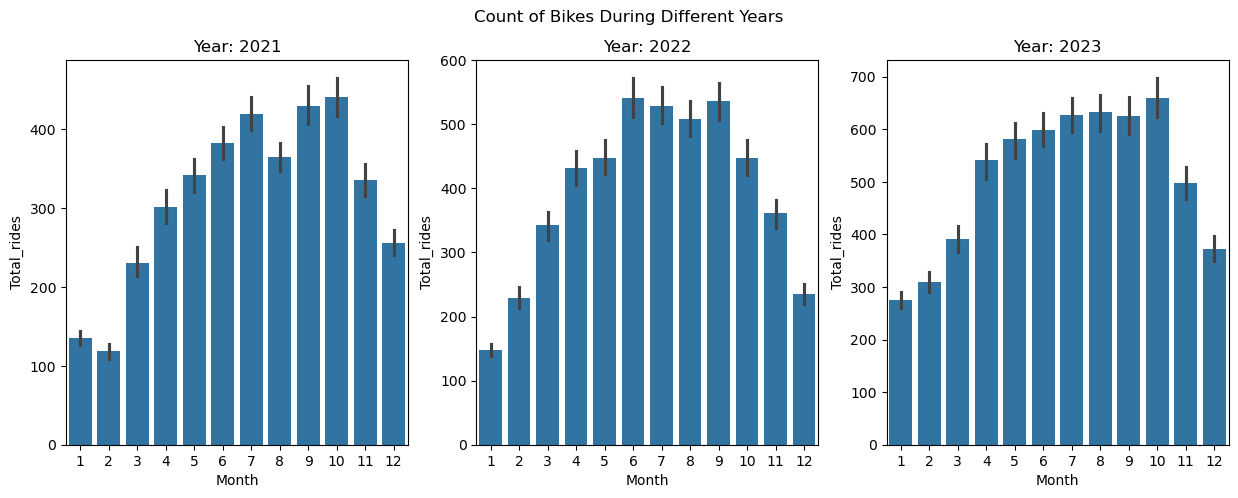

In [68]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

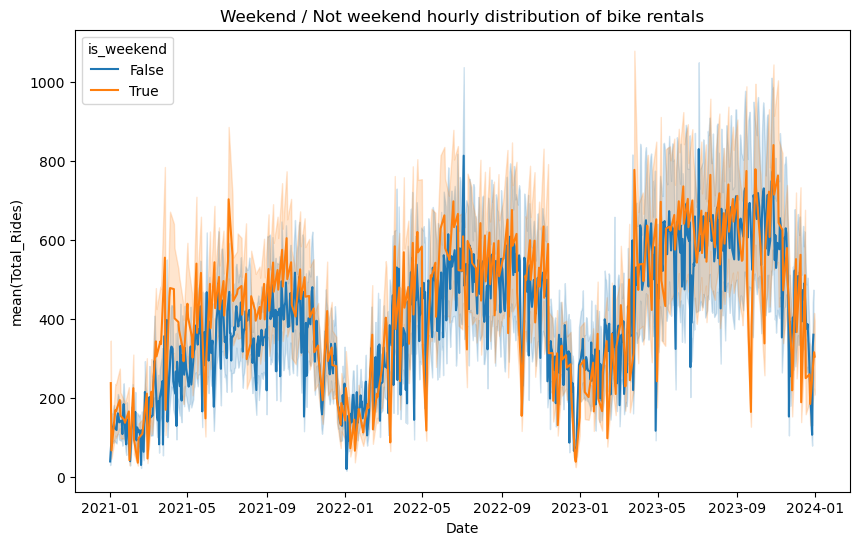

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Date', y='Total_rides', hue='is_weekend', data=dfH, estimator='mean')

# Add title and labels
plt.title('Weekend / Not weekend hourly distribution of bike rentals')
plt.xlabel('Date')
plt.ylabel('mean(Total_Rides)')

# Show the plot
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

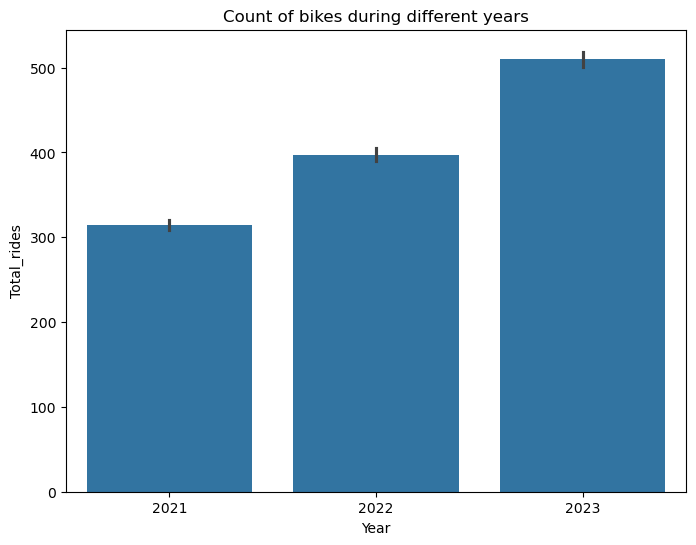

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

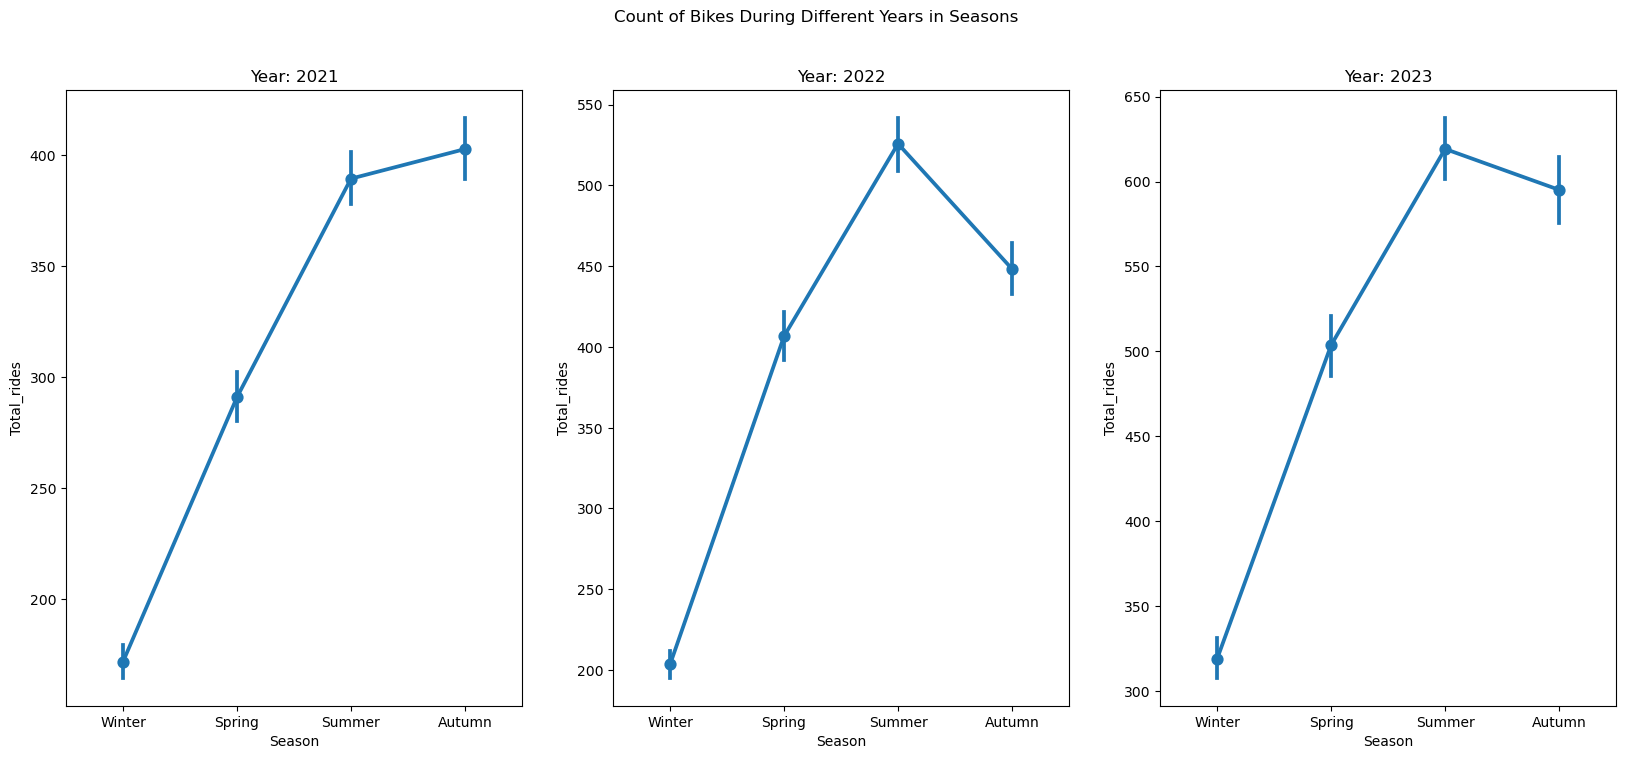

In [76]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Count of Bikes During Different Years in Seasons')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.pointplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

4. Feature Engineering (Optional)
        Create new features:

In [54]:

# Example: Create a new feature for day of the week (e.g., 'weekday', 'weekend')
dfH['day_type'] = dfH['is_weekday'].apply(lambda x: 'weekday' if x else 'weekend')


5. Statistical Analysis (Optional)
•	Correlation analysis:

<Axes: >

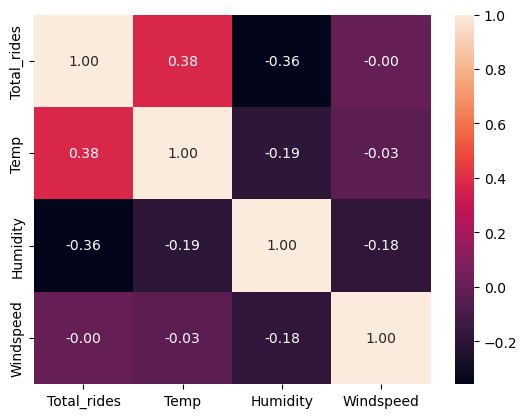

In [55]:
correlation_matrix = dfH[['Total_rides', 'Temp', 'Humidity', 'Windspeed']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')


##Hypothesis testing:

In [56]:
# Example: Test if there is a significant difference in rentals between weekdays and weekends
from scipy.stats import ttest_ind
weekday_rides = dfH[dfH['is_weekday'] == 1]['Total_rides']
weekend_rides = dfH[dfH['is_weekday'] == 0]['Total_rides']
ttest_ind(weekday_rides, weekend_rides)


TtestResult(statistic=-4.541632845250099, pvalue=5.606808017701419e-06, df=26278.0)

6. Machine Learning (Optional)
•	Train a model to predict bike rentals:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
dfH.head(3)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,is_weekday,is_weekend,is_holiday,is_working_day,day_type
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,4,Winter,True,False,False,True,weekday
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,4,Winter,True,False,False,True,weekday
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,4,Winter,True,False,False,True,weekday


In [59]:
# Split data into training and testing sets
X = dfH[['Temp', 'Humidity', 'Windspeed', 'Hour', 'Weekdays']]
y = dfH['Total_rides']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [60]:
# Train a linear regression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()